<a href="https://colab.research.google.com/github/EddyGiusepe/Sistema_RECOMENDACION_Netflix/blob/main/Netflix_RECOMMENDATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h2 align='center'>**Sistema de recomendação de filmes na Netflix com Python**</h2> 


**Cientista de Dados Jr.:**  Dr.Eddy Giusepe Chirinos Isidro

## 1. Importamos as nossas bibliotecas 

In [1]:
import numpy as np # Algebra linear
import pandas as pd # Para processar nossos Dados
import matplotlib.pyplot as plt
%matplotlib inline

import time
import seaborn as sns
import re
import math



## 2. Carregamos nossos Dados 

In [2]:
df = pd.read_csv("/content/drive/MyDrive/4_teoria_IA_ML_DL_Eddy/Sistema_recomendacion_Netflix/netflix_titles.csv")

In [3]:
df.shape

(7787, 12)

In [4]:
df.sample(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
3645,s3646,TV Show,Limmy's Show!,NaN,"Brian Limond, Debbie Welsh, Tom Brogan, Raymon...",United Kingdom,"October 1, 2019",2012,TV-MA,2 Seasons,"British TV Shows, TV Comedies","Scottish comic Brian ""Limmy"" Limond headlines ..."
41,s42,Movie,Ég man þig,Óskar Thór Axelsson,"Jóhannes Haukur Jóhannesson, Ágústa Eva Erlend...",Iceland,"March 27, 2018",2017,TV-MA,106 min,"Horror Movies, International Movies","Young urbanites renovating a rundown house, an..."
7638,s7639,Movie,Winter's Bone,Debra Granik,"Jennifer Lawrence, John Hawkes, Kevin Breznaha...",United States,"March 1, 2019",2010,R,100 min,"Dramas, Independent Movies","In this unflinching noir drama, a resilient te..."
4028,s4029,TV Show,Memories of the Alhambra,NaN,"Hyun Bin, Park Shin-hye, Park Hoon, Kim Yong-r...",South Korea,"December 2, 2018",2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Korean...",While looking for the cryptic creator of an in...
6228,s6229,Movie,The Cloverfield Paradox,Julius Onah,"Gugu Mbatha-Raw, David Oyelowo, Daniel Brühl, ...",United States,"February 5, 2018",2018,PG-13,102 min,"Action & Adventure, Sci-Fi & Fantasy","Orbiting above a planet on the brink of war, s..."
47,s48,Movie,1 Mile to You,Leif Tilden,"Billy Crudup, Graham Rogers, Liana Liberato, S...",United States,"July 7, 2017",2017,TV-14,105 min,"Dramas, Romantic Movies, Sports Movies",After escaping the bus accident that killed hi...
4666,s4667,Movie,Operation Christmas Drop,Martin Wood,"Kat Graham, Alexander Ludwig, Virginia Madsen,...",United States,"November 5, 2020",2020,TV-G,96 min,"Children & Family Movies, Comedies, Romantic M...",A by-the-book political aide falls for a big-h...
2785,s2786,TV Show,Home for Christmas,NaN,"Ida Elise Broch, Gabrielle Susanne Solheim Lei...",Norway,"December 18, 2020",2020,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",Tired of the constant comments on her relation...
903,s904,Movie,Big Fat Liar,Shawn Levy,"Frankie Muniz, Paul Giamatti, Amanda Bynes, Am...","United States, Germany","January 15, 2020",2002,PG,88 min,"Children & Family Movies, Comedies",Junior high students Jason and Kaylee take act...
2518,s2519,Movie,Grandmother's Farm,Ahmed Zein,"Saeed Al-Sheryani, Yaser Alneyadi, Khaled Al-N...",United Arab Emirates,"May 28, 2020",2014,TV-14,71 min,"Comedies, Horror Movies, International Movies",A guys' getaway to an isolated farm in the des...


## 3. Análise, limpeza e exploração de nossos Dados

In [5]:
# Aqui só a coluna "release_year" é do tipo inteiro

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [6]:
# Aqui ver a quantidade total de valores MISSING
# As colunas: director, cast, country, date_added e rating apresentam valores Missing. 

df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [7]:
# Outra maneira de visualizar os valores MISSING é:

df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

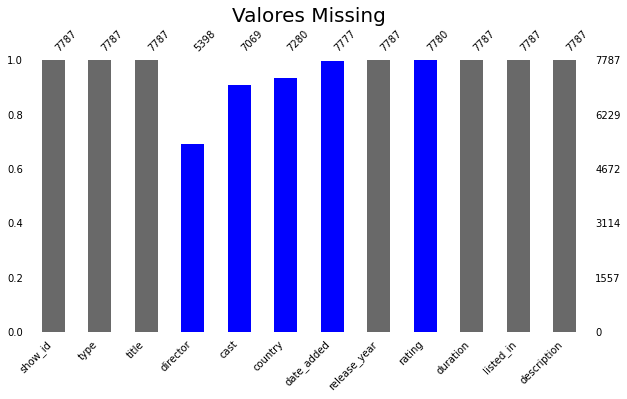

In [8]:
# Aqui vamos a usar o seguinte método para visualizar os Dados MISSING
# As colunas "director" e "cast" podem ser eliminadas, já que não podem ser completadas aleatoriamente (obvio: valores muitos versáteis)
# Para um número mínimo de valores Missing nas colunas "country", "date_added" e "rating", podemos completar eles usando a MODA ou a MÉDIA.

import missingno 

color = ["dimgrey","dimgrey","dimgrey","blue","blue","blue","blue","dimgrey","blue","dimgrey","dimgrey","dimgrey"]
missingno.bar(df, fontsize=10, color=color, figsize=(10, 5))
plt.title("Valores Missing", fontsize=20)
plt.show()


In [9]:
# Ideia na coluna "country"

df["country"].value_counts()

United States                                     2555
India                                              923
United Kingdom                                     397
Japan                                              226
South Korea                                        183
                                                  ... 
Saudi Arabia, Syria, Egypt, Lebanon, Kuwait          1
United States, Botswana                              1
United Kingdom, Belgium, Sweden                      1
Philippines, United States                           1
Germany, United States, United Kingdom, Canada       1
Name: country, Length: 681, dtype: int64

In [10]:
# Facilmente podemos observar que o valor mais comum é: "United States". 
# É a moda!

df["country"].mode()[0]

'United States'

In [11]:
# Ideia na coluna "rating"

df["rating"].value_counts()

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [12]:
df["rating"].mode()[0]

'TV-MA'

In [13]:
# Aqui vamos a tratar os campos mencioandos acima

df["country"] = df["country"].fillna(df["country"].mode()[0])
df["date_added"] = df["date_added"].fillna(df["date_added"].mode()[0]) 
df["rating"] = df["rating"].fillna(df["rating"].mode()[0])


In [14]:
# Aqui, novamente, visualizamos a quantidade total de valores MISSING 

df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country            0
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

In [15]:
# A seguir ELIMINAMOS as LINHAS em: "cast" e "director" (os motivos foi explicado acima)

df = df.dropna(how="any", subset=["cast", "director"])


In [16]:
df.shape

(4979, 12)

In [17]:
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w..."
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...
10,s11,Movie,1922,Zak Hilditch,"Thomas Jane, Molly Parker, Dylan Schmid, Kaitl...",United States,"October 20, 2017",2017,TV-MA,103 min,"Dramas, Thrillers",A farmer pens a confession admitting to his wi...


In [18]:
# Mais uma vez visualizamos nossos Dados

df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [19]:
df.shape

(4979, 12)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4979 entries, 1 to 7783
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       4979 non-null   object
 1   type          4979 non-null   object
 2   title         4979 non-null   object
 3   director      4979 non-null   object
 4   cast          4979 non-null   object
 5   country       4979 non-null   object
 6   date_added    4979 non-null   object
 7   release_year  4979 non-null   int64 
 8   rating        4979 non-null   object
 9   duration      4979 non-null   object
 10  listed_in     4979 non-null   object
 11  description   4979 non-null   object
dtypes: int64(1), object(11)
memory usage: 505.7+ KB
